In [1]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [3]:
glob('*.csv')

['insurance.csv']

In [4]:
# Seed 고정

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [5]:
data = pd.read_csv('insurance.csv',encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Null Check

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Not Null

In [7]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [8]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

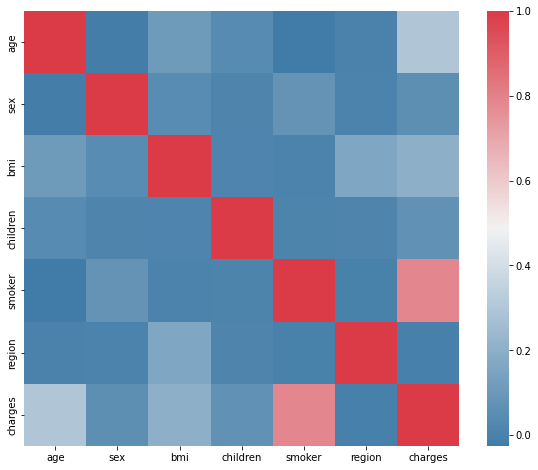

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

## corr 높은 순으로 분석

In [10]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

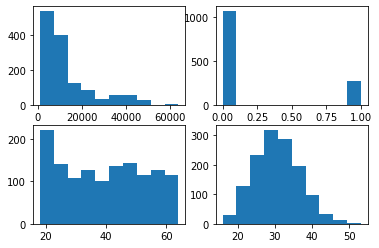

In [11]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(data['charges'])
axes[0,1].hist(data['smoker'])
axes[1,0].hist(data['age'])
axes[1,1].hist(data['bmi'])

In [ ]:
def eda(col1 : str, col2 : str):
    data.groupby([col2, col1])[['charges']].mean()
    smoker_grouped = data.groupby([col1, col2])
    smoker_group_mean_charges = smoker_grouped['charges'].mean().unstack()
    smoker_group_mean_charges.plot(kind='bar')
    plt.xlabel(col1)
    plt.ylabel('Mean Charges')
    plt.title(f'Mean Medical Charges by {col1} Group and {col2} Status')
    plt.show()

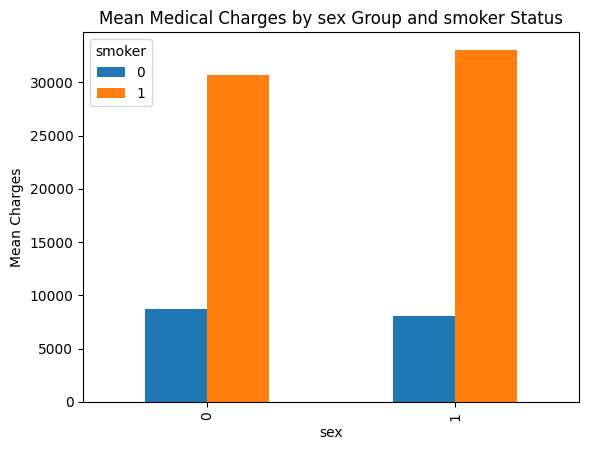

In [ ]:
eda('sex','smoker')

In [ ]:
# 흡연 여부에 따른 연령대의 진료비 청구금액 평균 비교를 위해 연령대 그룹화

data['age_group'] = pd.cut(data['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

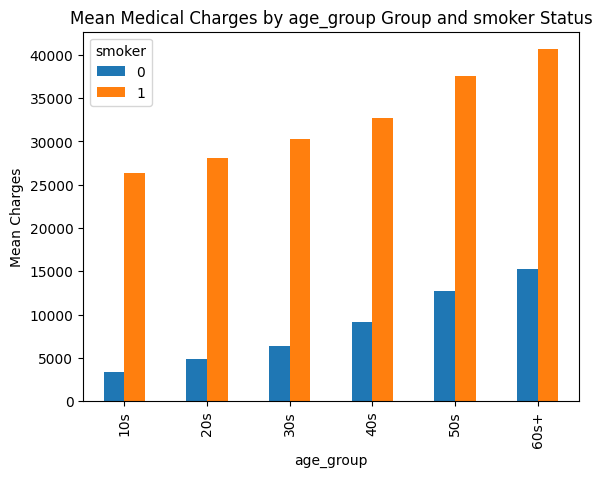

In [ ]:
eda('age_group','smoker')

In [ ]:
# 흡연 여부에 따른 BMI별 의료비 청구금액의 평균을 구하기 위해 BMI그룹화

bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
data['bmi_group'] = pd.cut(data['bmi'], bins=bins, labels=labels)

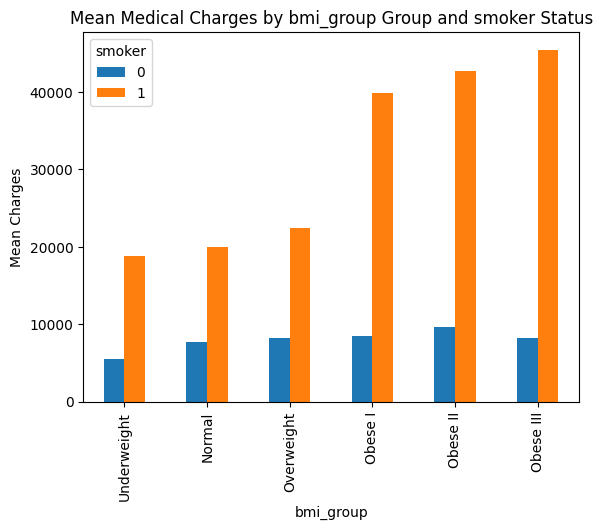

In [ ]:
eda('bmi_group','smoker')

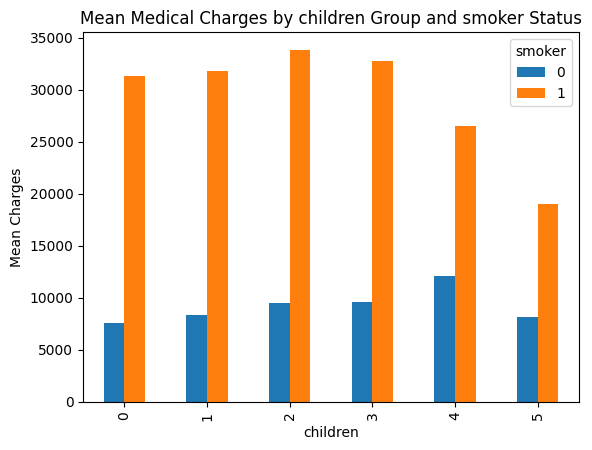

In [ ]:
eda('children','smoker')

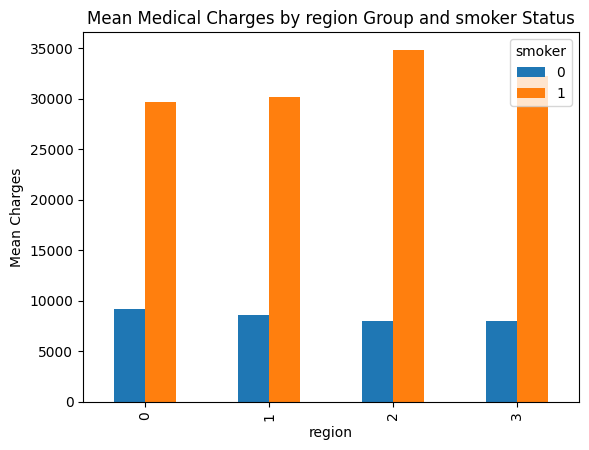

In [ ]:
eda('region','smoker')

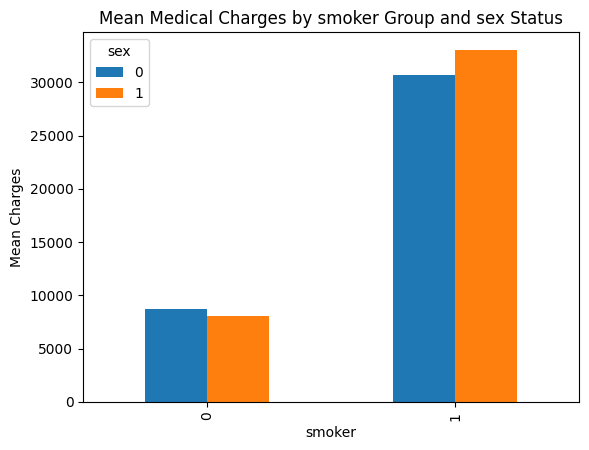

In [ ]:
eda('smoker','sex')

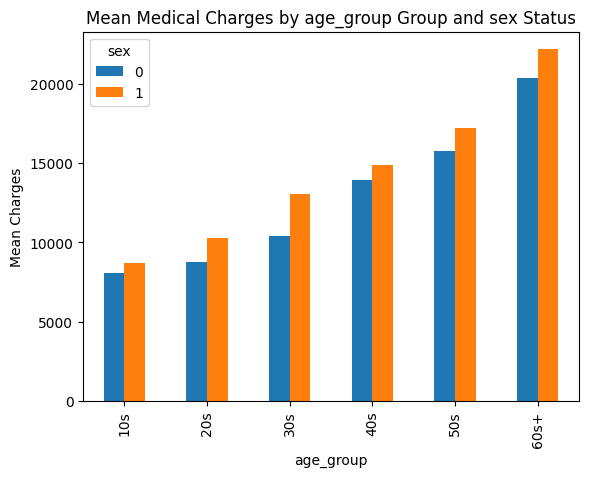

In [ ]:
eda('age_group','sex')

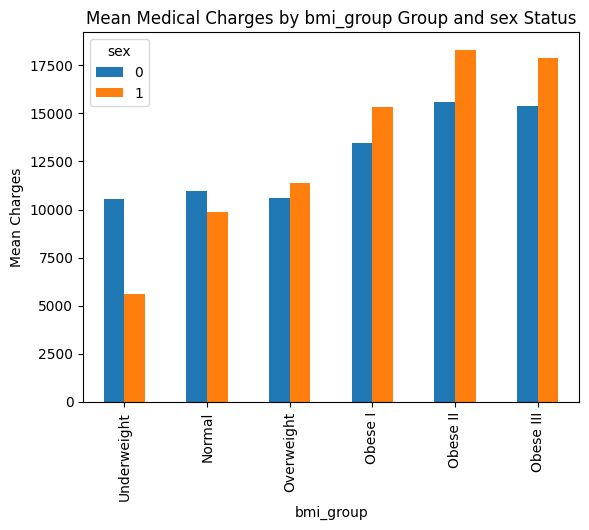

In [ ]:
eda('bmi_group','sex')

### Outlier Detection

<AxesSubplot: ylabel='charges'>

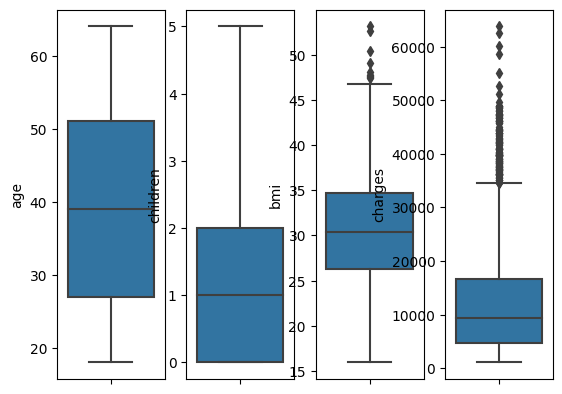

In [ ]:
# 이상치 탐지를 위해 boxplot을 그려보겠습니다.
plt.subplot(1,4,1)
sns.boxplot(data=data, y='age')
plt.subplot(1,4,2)
sns.boxplot(data=data, y='children')
plt.subplot(1,4,3)
sns.boxplot(data=data, y='bmi')
plt.subplot(1,4,4)
sns.boxplot(data=data, y='charges')

In [ ]:
# IQR(Q3 - Q1)로부터 이상치 파악하기
bmi_q1 = data['bmi'].quantile(q=0.25)
bmi_q3 = data['bmi'].quantile(q=0.75)
iqr = bmi_q3 - bmi_q1

# (q1 - (iqr * 1.5))와 (q3 + (iqr * 1.5))를 벗어난 값이 이상치입니다.
condi1 = (data['bmi'] < (bmi_q1 - (1.5 * iqr)))
condi2 = (data['bmi'] > (bmi_q3 + (1.5 * iqr)))
outliers = data[condi1 | condi2]
outliers['bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

<AxesSubplot: xlabel='charges', ylabel='Count'>

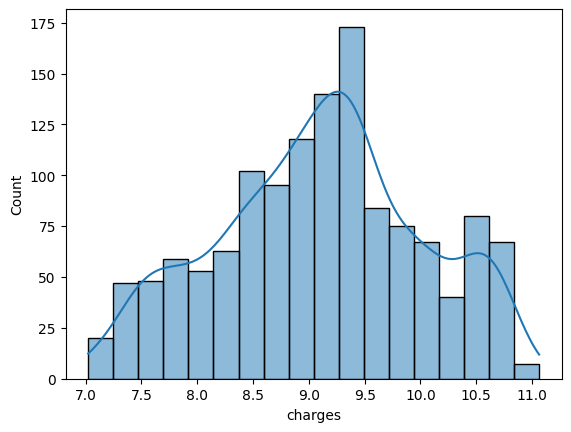

In [ ]:
# 진료비 금액의 count barplot

sns.histplot(np.log(data.charges), kde=True)

<AxesSubplot: xlabel='charges', ylabel='Count'>

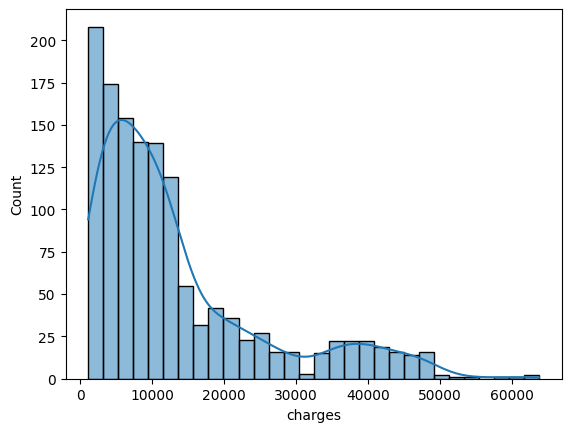

In [ ]:
sns.histplot(data.charges, kde=True)

In [ ]:
# resampling

from sklearn.utils import resample

results_median = []
results_mean = []

In [ ]:
# 중앙값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(data['charges'])
    results_median.append(sample.median())

In [ ]:
# 평균값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(data['charges'])
    results_mean.append(sample.mean())

In [ ]:
# 각각의 list를 Series 형태로 변환

results_median = pd.Series(results_median)
results_mean = pd.Series(results_mean)

<AxesSubplot: ylabel='Count'>

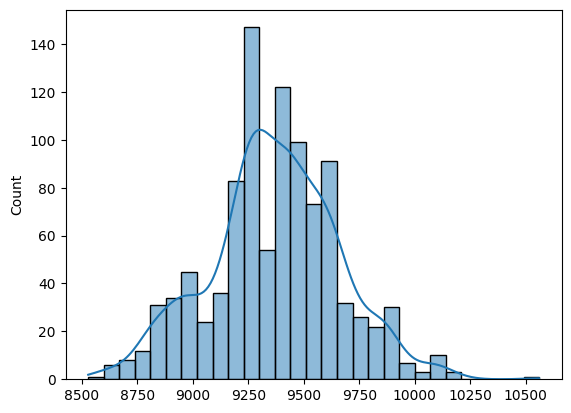

In [ ]:
# resampling한 중앙값 데이터를 시각화

sns.histplot(results_median, kde=True)

In [ ]:
# 범주형 변수와 수치형 변수를 분리

cat_features = data.select_dtypes(include=['object']).columns.to_list()
num_features = data.select_dtypes(exclude=['object']).columns.to_list()

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group'],
      dtype='object')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,0,27.900,0,1,3,16884.92400,10s,Overweight
1,18,1,33.770,1,0,2,1725.55230,10s,Obese I
2,28,1,33.000,3,0,2,4449.46200,20s,Obese I
3,33,1,22.705,0,0,1,21984.47061,30s,Normal
4,32,1,28.880,0,0,1,3866.85520,30s,Overweight


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [ ]:
data = data.drop(['age_group','bmi_group','region','sex','smoker'],axis=1)

In [ ]:
x = data.drop(['charges'],axis=1)

y = data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(x,y, test_size=0.2)

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()    
]

In [ ]:
lst = []
for model in models:
    name = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    lst.append([model,mae])

Model LinearRegression - MAE: 4577.4768
Model Ridge - MAE: 4583.8766
Model Lasso - MAE: 4577.7436
Model ElasticNet - MAE: 7210.3008
Model DecisionTreeRegressor - MAE: 2918.4322
Model RandomForestRegressor - MAE: 3102.2015
Model SVR - MAE: 6757.8300
Model KNeighborsRegressor - MAE: 7657.7429
Model MLPRegressor - MAE: 7272.1786


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group'],
      dtype='object')

In [ ]:
data = pd.read_csv('insurance.csv',encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 흡연 여부에 따른 연령대의 진료비 청구금액 평균 비교를 위해 연령대 그룹화

data['age_group'] = pd.cut(data['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

In [ ]:
bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
data['bmi_group'] = pd.cut(data['bmi'], bins=bins, labels=labels)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

In [ ]:
def one_hot_encoded(df):
    ohe.fit(df.values.reshape(-1,1))
    one_hot_encoded = ohe.transform(df.values.reshape(-1,1))
    ohe_df = pd.DataFrame(one_hot_encoded, columns=ohe.categories_[0])
    return ohe_df

In [ ]:
ohe_df = one_hot_encoded(data['sex'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'male',1:'female'},inplace=True)

In [ ]:
ohe_df = one_hot_encoded(data['smoker'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'Non-smoke',1:'smoker'},inplace=True)

In [ ]:
ohe_df = one_hot_encoded(data['region'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'southwest',1:'southeast',
                     2:'northwest',3:'northeast'},inplace=True)

In [ ]:
ohe_df = one_hot_encoded(data['bmi_group'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'Overweight',1:'Obese I',2:'Normal',
                     3:'Obese II',4:'Obese III',5:'Underweight'},inplace=True)

In [ ]:
ohe_df = one_hot_encoded(data['age_group'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'10s',1:'20s',
                     2:'30s',3:'40s',
                     4:'60s+',5:'50s'},inplace=True)

In [ ]:
data.bmi_group.unique()

['Overweight', 'Obese I', 'Normal', 'Obese II', 'Obese III', 'Underweight']
Categories (6, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese I' < 'Obese II' < 'Obese III']

In [ ]:
data = data.drop(['age_group','bmi_group','region','sex','smoker'],axis=1)
data.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,...,Obese II,Obese III,Overweight,Underweight,10s,20s,30s,40s,50s,60s+
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
x = data.drop(['charges'],axis=1)

y = data['charges']

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(x,y, test_size=0.2)

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()    
]

In [ ]:
lst = []
for model in models:
    name = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    lst.append([model,mae])

Model LinearRegression - MAE: 4434.6445
Model Ridge - MAE: 4430.3974
Model Lasso - MAE: 4431.4051
Model ElasticNet - MAE: 6061.8594
Model DecisionTreeRegressor - MAE: 3203.7152
Model RandomForestRegressor - MAE: 2869.8130
Model SVR - MAE: 8070.3666
Model KNeighborsRegressor - MAE: 6867.1731
Model MLPRegressor - MAE: 7577.1840


In [ ]:
import pycaret

In [ ]:
from pycaret.regression import RegressionExperiment

s = RegressionExperiment()
s.setup(data, target = 'charges', session_id = 123)
best = s.compare_models()

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 24)"
4,Transformed data shape,"(1338, 24)"
5,Transformed train set shape,"(936, 24)"
6,Transformed test set shape,"(402, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.6419,23293759.9682,4806.2493,0.8338,0.4480,0.3181,0.0200
rf,Random Forest Regressor,2802.6681,25366609.9949,5023.7201,0.8170,0.4765,0.3434,0.0490
catboost,CatBoost Regressor,2885.6382,25682894.7005,5054.9683,0.8162,0.4921,0.3627,0.2920
ada,AdaBoost Regressor,4261.7276,28944148.1909,5370.3325,0.7944,0.6358,0.7310,0.0080
et,Extra Trees Regressor,2840.8579,29742598.1231,5418.8141,0.7833,0.4947,0.3509,0.0480
xgboost,Extreme Gradient Boosting,3307.7649,31624578.0000,5606.4348,0.7706,0.5653,0.4121,0.1580
br,Bayesian Ridge,4301.6112,37419464.3648,6094.9895,0.7381,0.5872,0.4606,0.0060
ridge,Ridge Regression,4301.0145,37438460.0000,6096.5688,0.7379,0.5911,0.4606,0.0060
lasso,Lasso Regression,4298.5081,37447378.8000,6097.3192,0.7378,0.5900,0.4600,0.0070
lr,Linear Regression,4301.5493,37470494.6000,6099.2161,0.7376,0.5966,0.4607,0.1730


- MAE 기준 상위 모델 5개 선정(?)

gbr, rf, et, cat, huber